# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Sckit-learn library.

What we're going to cover:

0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. choose the right estimator/algorithm for our program
3. fit the model/algorithm and use it to make predictions on our data
4. evaluating a model
5. improve a model
6. save and load a trained model
7. put it all together

In [1]:
#standard imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## 0.An end-to-end scikit-learn workflow

In [2]:
#1. get te data ready
import pandas as pd
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (features matrix)
X=heart_disease.drop("target",axis=1)

#create y (labels)
y=heart_disease["target"]

In [4]:
import warnings
warnings.filterwarnings("ignore") # can change it to default for the warnings to show 

In [5]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. fit the model to the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\farhe\codesss\miniconda_projects\env\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.26.3
        scipy: 1.11.4
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\farhe\codesss\miniconda_projects\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 10
threading_layer: intel

       filepath: C:\Users\farhe\codesss\miniconda_projects\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12


In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
#make prediction
y_label=clf.predict(np.array([0,2,3,4])

SyntaxError: incomplete input (318560893.py, line 2)

In [10]:
y_preds=clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [11]:
y_test

93     1
88     1
69     1
23     1
226    0
      ..
44     1
57     1
283    0
177    0
209    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train,y_train)

1.0

In [13]:
clf.score(X_test,y_test)

0.8524590163934426

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.90      0.88      0.89        41

    accuracy                           0.85        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.85      0.85        61



In [15]:
confusion_matrix(y_test,y_preds)

array([[16,  4],
       [ 5, 36]], dtype=int64)

In [16]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [17]:
#5. Improve the model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 20 estimators...
Model accuracy on test set: 77.05%

Trying model with 30 estimators...
Model accuracy on test set: 86.89%

Trying model with 40 estimators...
Model accuracy on test set: 85.25%

Trying model with 50 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 88.52%

Trying model with 70 estimators...
Model accuracy on test set: 88.52%

Trying model with 80 estimators...
Model accuracy on test set: 90.16%

Trying model with 90 estimators...
Model accuracy on test set: 88.52%



In [18]:
# 6. save a model and load it
import pickle 
pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [19]:
loaded_model=pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test,y_test)

0.8852459016393442

## 1. getting our data ready to be used with machine learning 

3 main things we have to do:
1. split the data into features and labels (usually 'X' & 'y')
2. filling (also called as imputing) or disregarding missing values
3. converting non-numerical values to numerical values (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X=heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
X.shape

(303, 13)

In [26]:
X.shape[0]*0.8

242.4

In [27]:
len(heart_disease)

303

### 1.1 make sure it's all numerical 

In [28]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# split into X/y
X=car_sales.drop(['Price'],axis=1)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
y=car_sales["Price"]
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [33]:
#Splitting into training and test set 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [34]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [35]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder #Encode categorical features as a one-hot numeric array.
from sklearn.compose import ColumnTransformer # transform an entire column

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_X=transformer.fit_transform(X) #fit_transform is a convenience method that combines the fitting and transformation steps into one call.
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [37]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
# converting the numeric data into dataframe using pandas
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies.astype(int)

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [39]:
# let's refit the moedl 
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 what if there were missing values?

1. fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [42]:
# import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [43]:
#this is to show the number of missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# create X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [45]:
#let's convert the data into numbers
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Previous version shows "contains NaN" error but not in this version
### Option 1: Fill missing data with Pandas

In [46]:
# fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [47]:
#Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [48]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [50]:
len(car_sales_missing) # we lost some data

950

In [51]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing data with Scikit-learn

In [53]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [54]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [55]:
#drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [57]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

#Fill categorical values with 'missing' and numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_feature=["Doors"]
num_features=["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

# transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [58]:
car_sales_filled=pd.DataFrame(filled_X,
                              columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [59]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [61]:
# now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                                     y,
                                                     test_size=0.2)
#the order of X_train,X_test,y_train,y_test matters
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [62]:
len(car_sales_filled),len(car_sales_missing),len(car_sales)

(950, 950, 1000)

In [63]:
what_were_covering =['0. An end-to-end Scikit-Learn workflow',
'1. Getting the data ready',
'2. Choose the right estimator/algorithm for our program',
'3. Fit the model/algorithm and use it to make predictions on our data',
'4. Evaluating a model',
'5. improve a model',
'6. save and load a trained model',
'7. Put it all together']

In [64]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our program',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. improve a model',
 '6. save and load a trained model',
 '7. Put it all together']

## 2. Choosing the right estimator/algorithm for your problem
some things to note:
* Sklearn refers to machine learning models,algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a ML problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn ML map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a ML model for regression problem
Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [65]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [66]:
housing_df=pd.DataFrame(housing["data"],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [67]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [68]:
housing_df=housing_df.drop("MedHouseVal",axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [69]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"] # median house price in $100,000s

# Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=Ridge()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.5758549611440126

In [70]:
# trying different model - ElasticNet
# import algorithm/estimator
from sklearn.linear_model import ElasticNet

# Setup random seed
np.random.seed(42)

# Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"] # median house price in $100,000s

# Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=ElasticNet()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.41655189098028245

In [71]:
# trying different model - Ensemble methods
# import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"] # median house price in $100,000s

# Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=RandomForestRegressor()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.8065734772187598

## 2.2 Picking a ml model for a classification problem

In [72]:
# trail
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [73]:
iris_df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [74]:
iris_df['target']=iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [75]:
# trying different model - Ensemble methods
# import algorithm/estimator
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X=iris_df.drop("target",axis=1)
y=iris_df["target"] 

# Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=RandomForestClassifier()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

1.0

In [76]:
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
len(heart_disease)

303

`linearSVC`

In [78]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"] 

# Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=LinearSVC()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.8688524590163934

In [79]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [80]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"] 

# Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=RandomForestClassifier()
model.fit(X_train,y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.8524590163934426

Note:
* if you have structured data, use ensemble methods
* if you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [81]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"] 

# Split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=RandomForestClassifier()

# fit the model to the data (training the ml model)
model.fit(X_train,y_train)

# Check the score of the model (on the test set)(use the patterns the model hs learned)
model.score(X_test,y_test)

0.8524590163934426

## 3.2 Make predictions using a ml model
2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [82]:
# Use a trained model to make predictions
clf.predict(np.array([1,3,4,9,8])) # this doesn't work...

ValueError: Expected 2D array, got 1D array instead:
array=[1. 3. 4. 9. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [84]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
np.array([y_test]) # to display as formatted in the array

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [86]:
# Compare predictions to truth labels to evaluate the model
y_preds=model.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [87]:
model.score(X_test,y_test)

0.8524590163934426

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [89]:
# predict_proba() returns probabilities of a classification label(basically tells the probability of both the labels, highest one is selected)
model.predict_proba(X_test[0:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [90]:
# let's predict() on the same data....
model.predict(X_test[0:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [91]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used fo regression models.

In [92]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [93]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X=housing_df.drop("target",axis=1)
y=housing_df['target']

# split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# create model instance
clf=RandomForestRegressor()

# fit the data
clf.fit(X_train,y_train)

# check score
clf.score(X_test,y_test)

0.8065734772187598

In [94]:
y_preds=clf.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [95]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [96]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

## 4. Evaluating a ML model

3 ways to evaluate Scikit-Learn models/estimators:
1. Estimators's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

Resource: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the`score` method

In [97]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# create X & y
X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# create classifier model instance
model=RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
model.score(X_train,y_train)

1.0

In [99]:
model.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` on our regression problem..

In [100]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create X & y
X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# create classifier model instance
model=RandomForestRegressor(n_estimators=100)

# Fit classifier to training data
model.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
# the default score() evaluation metric is r-squared for regression algorithms
model.score(X_train,y_train)

0.924203269641995

In [102]:
model.score(X_test,y_test)

0.5106393318965518

### 4.2 Evaluating a model with the`scoring` parameter

In [103]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# create X & y
X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

# create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# create classifier model instance
model=RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train,y_train);

In [104]:
model.score(X_test,y_test)

0.8524590163934426

In [105]:
cross_val_score(model,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [106]:
cross_val_score(model,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [107]:
np.random.seed(42)

# single training and test split score
model_single_score=model.score(X_test,y_test)

# take the mean of the 5-fold cross-validation score
model_cross_val_score=np.mean(cross_val_score(model,X,y,cv=5))

# Compare the two
model_single_score, model_cross_val_score
# note: always the cross-validation score is preferred than a single score

(0.8524590163934426, 0.8248087431693989)

In [108]:
# default scoring parameter of classifier = mean accuracy
model.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [109]:
# scoring parameter set to None by default
cross_val_score(model,X,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy - shows how accurately the score is evaluated
2. Area under Receiver Operating Characteristic curve (AUC/ROC)
3. Confustion matrix
4. Classfication report

**Accuracy**

In [110]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease['target']

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y)

In [112]:
np.mean(cross_val_score)

0.8248087431693989

In [113]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}% ")

Heart Disease Classifier Cross-Validated Accuracy: 82.48% 


**Area under the Receiver Operating Characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) v/s a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [114]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [115]:
from sklearn.metrics import roc_curve

# fit the model
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs=clf.predict_proba(X_test)

y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [116]:
y_probs_positive=y_probs[:,1]
y_probs_negative=y_probs[:,0]
y_probs_negative[:10],y_probs_positive[:10]

(array([0.51, 0.17, 0.51, 0.72, 0.43, 0.12, 0.3 , 0.97, 0.15, 0.4 ]),
 array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ]))

In [117]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# check the fprs
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

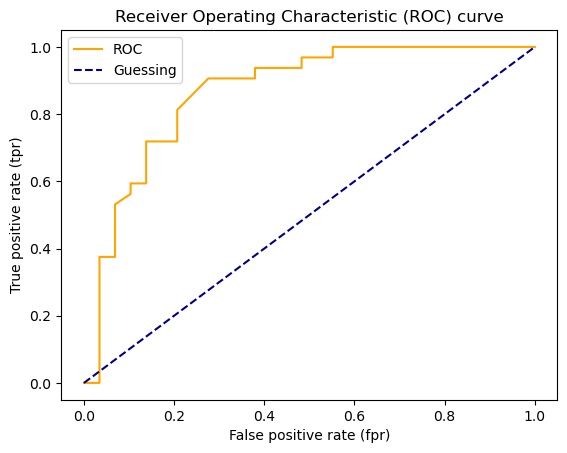

In [118]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and 
    True positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label= "Guessing")
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [119]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

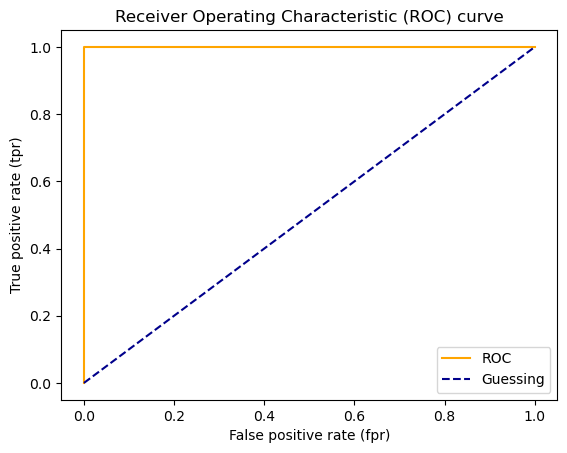

In [120]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresolds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [121]:
# perfect AUC score 
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [122]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [123]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [124]:
23+6+6+26

61

In [125]:
len(y_preds)

61

In [126]:
# to install a module directly from jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



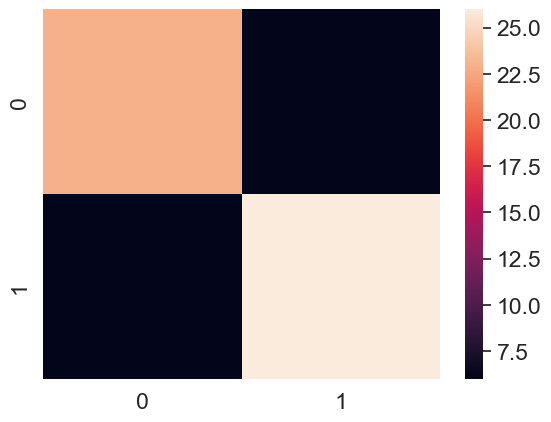

In [127]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

## Creating a confusion matrix using Scikit-Learn 
To use the new methods of creating a confusion matrix with Scikit-Learn you will need sklearn version 1.0+

In [128]:
import sklearn
sklearn.__version__

'1.2.2'

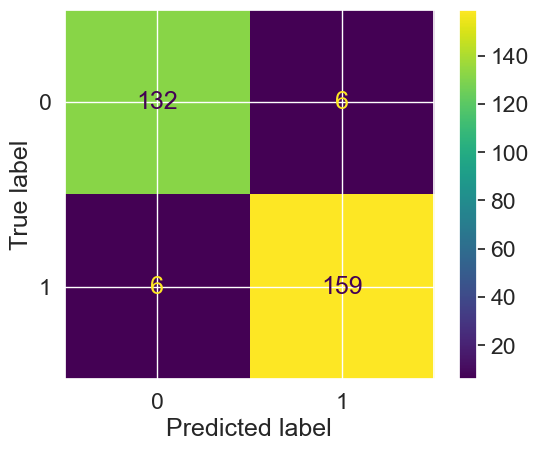

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y) # without the prediction being ready

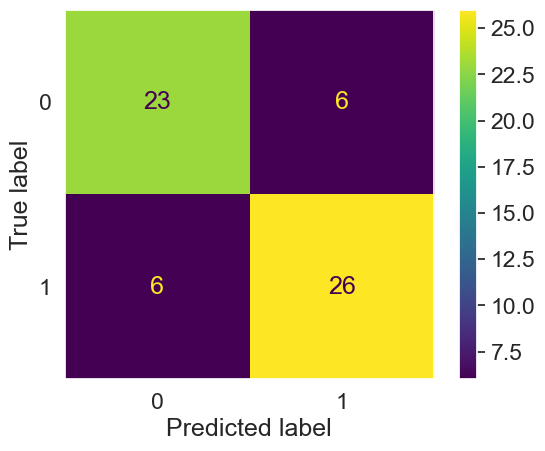

In [130]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds)
plt.grid(False) # to remove the gridlines from the plot

**Classification Report**

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [132]:
# Where precision and recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics
documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [133]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [134]:
model.score(X_test,y_test)

0.8065734772187598

In [135]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [136]:
y_test.mean()

2.0550030959302323

#### R^2
What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [137]:
from sklearn.metrics import r2_score

# fill an array woth y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [138]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [139]:
r2_score(y_true=y_test,
         y_pred=y_test_mean) # poorest model (average/mean of test values)

0.0

In [140]:
r2_score(y_true=y_test,
         y_pred=y_test) # perfect model

1.0

#### Mean absolute error (MAE)
MAE is the avg of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [141]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae 

0.32659871732073664

In [142]:
df=pd.DataFrame(data={"actual values":y_test,
                      "predicted values": y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [143]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

#### Mean squared error (MSE)
MSE is the mean of the square of the errors between predicted values and actual values.

In [144]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse 

0.2534678520824551

In [145]:
df["squared differences"]=np.square(df["differences"])
df.head(10)

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


In [146]:
df["squared differences"].mean()

0.2534678520824551

In [147]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared differences"]=16

In [148]:
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [149]:
# calculate MSE with large error
df_large_error["squared differences"].mean()

0.2573437523766412

In [150]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [151]:
df_large_error["squared differences"].mean()

0.7334180712088106

### 4.3.2 Finally using the`scoring()` parameter 

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()

In [153]:
np.random.seed(42) 
# cross-validation accuracy
cv_acc= cross_val_score(clf,X,y,cv=5,scoring=None) # if scoring=None, estimators's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [154]:
# cross-validated accuracy 
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [155]:
np.random.seed(42) 
# cross-validation accuracy
cv_acc= cross_val_score(clf,X,y,cv=5,scoring="accuracy") # if scoring=None, estimators's default scoring evaulation metric is used (accuracy for classification models)
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [156]:
# precision
np.random.seed(42)
cv_precision= cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [157]:
# cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 83.30%


In [158]:
# Recall
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
# cross-validated Recall
print(f"The cross-validated Recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated Recall is: 85.45%


 Let's see the `scoring` parameter being using for a regression problem...

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

clf=RandomForestRegressor()

In [160]:
# neg_mean_absolute_error
np.random.seed(42)
cv_mae=cross_val_score(clf,X,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46620501732073655

In [161]:
# neg_mean_squared_error
np.random.seed(42)
cv_mse=cross_val_score(clf,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46141356443710196

In [162]:
# R^2
np.random.seed(42)
cv_r2=cross_val_score(clf,X,y,cv=3,scoring=None)
np.mean(cv_r2)
# cross-validated R^2
print(f"The cross-validated R2 is: {np.mean(cv_r2)*100:.2f}%")

The cross-validated R2 is: 65.45%


In [163]:
cv_mae,cv_mse

(array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856]),
 array([-0.51017222, -0.33368897, -0.5403795 ]))

## 4.3 Using different evaluation metrics as Scikit-Learn functions
the 3rd way to evaluate Scikit-Learn machine learning models/estimators is to using the `sklearn.metrics` module 

In [164]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#creating X and y
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#creating the model
model=RandomForestClassifier()

#fitting the model
model.fit(X_train,y_train)

# predictions
y_preds=model.predict(X_test)

# Evaluate the model using evaluation functions
accuracy_score(y_test,y_preds)

0.8524590163934426

In [165]:
precision_score(y_test,y_preds)

0.8484848484848485

In [166]:
recall_score(y_test,y_preds)

0.875

In [167]:
f1_score(y_test,y_preds)

0.8615384615384615

In [168]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#creating X and y
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#creating the model
model=RandomForestRegressor()

#fitting the model
model.fit(X_train,y_train)

# predictions
y_preds=model.predict(X_test)

# Evaluate the model using evaluation functions
r2_score(y_test,y_preds)

0.8065734772187598

In [169]:
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [170]:
mean_squared_error(y_test,y_preds) # you can decorate the output if you want

0.2534678520824551

## 5. Improving a model

First predictions = baseline predictions.
first model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we imporve the currect model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparamters = settings on a model you can adjust to (potentially) imporve it's abitily to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [171]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [172]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

Let's make 3. sets, training, validation and test.


In [173]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [174]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metrics_dict = {"accuracy": round(accuracy,2),
                    "precision": round(precision,2),
                    "recall": round(recall,2),
                    "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1 score: {f1:.2f}")

    return metrics_dict

In [175]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X,y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of data
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22
Precision: 0.81
Recall: 0.88
f1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [176]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00
Precision: 0.81
Recall: 0.84
f1 score: 0.82


## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [177]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X & y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForstClassifier
clf = RandomForestClassifier(n_jobs=1) # n_jobs defines how much computer power you want to dedicate to program 

# Setup RanRandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [178]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [179]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97
Precision: 0.77
Recall: 0.86
f1 score: 0.81


## 5.3 Hyperparameter tuning with GridSearchCV

In [180]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [181]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None, 5, 10, 20, 30],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [191]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# # Instantiate RandomForstClassifier
# clf = RandomForestClassifier(n_jobs=1) # n_jobs defines how much computer power you want to dedicate to program 

# # Setup GridSearchCV
# gs_clf = GridSearchCV(estimator=clf,
#                       param_grid=grid_2,
#                       cv=5,
#                       verbose=2)

# fit the RandomizedSearchCV version of clf
# gs_clf.fit(X_train, y_train)

In [183]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [184]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 80.33
Precision: 0.75
Recall: 0.86
f1 score: 0.80


Let's compare our different models metrics.

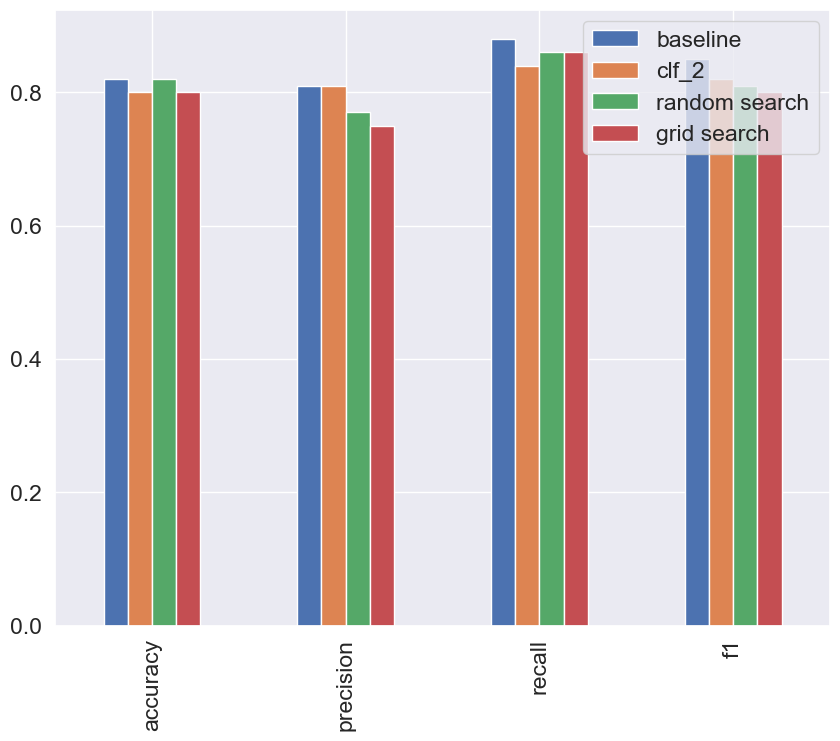

In [185]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading training machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [187]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [188]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [192]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 80.33
Precision: 0.75
Recall: 0.86
f1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

**Joblib**

In [193]:
from joblib import dump,load 

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [195]:
# import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [196]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 80.33
Precision: 0.75
Recall: 0.86
f1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

## 7. Putting it all together!

In [197]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [199]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [200]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [208]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer,categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer,numeric_feature)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `pipeline`.

In [209]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [210]:
gs_model.score(X_test,y_test)

0.3339554263158365